## Research question

### Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

# Best Classifiers

## XGBoost
### Train Acc= 0.9417040358744395
### Test Acc= 0.7081339712918661

## Random Forest
### Train Acc= 0.952914798206278
### Test Acc= 0.7511961722488039

## Soft Voting
### Test Acc= 0.7679372197309418
### Train Acc= 0.6602870813397129

## KNN(k=6)
### Train Acc= 0.743274
### Test Acc= 0.655502

## Out of Bag on DecisionTree
### Train Accuracy 0.952914798206278
### Test Accuracy 0.7416267942583732
### OOB Score 0.7982062780269058

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [17]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [18]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [19]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [20]:
X_train.shape

(892, 43)

In [21]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['age', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famrel', 'famsup_no']] 
y_test = X_test['alc']
X_test = X_test[['age', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famrel', 'famsup_no']] 

In [22]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [23]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [24]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [25]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

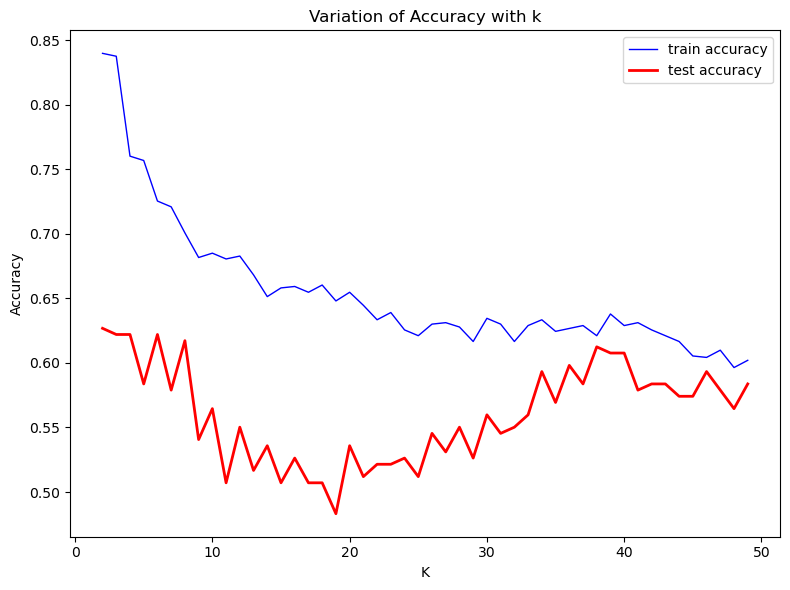

In [27]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [28]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.839686  0.626794
1    3   0.837444  0.622010
2    4   0.760090  0.622010
3    5   0.756726  0.583732
4    6   0.725336  0.622010
5    7   0.720852  0.578947
6    8   0.700673  0.617225
7    9   0.681614  0.540670
8   10   0.684978  0.564593
9   11   0.680493  0.507177
10  12   0.682735  0.550239
11  13   0.668161  0.516746
12  14   0.651345  0.535885
13  15   0.658072  0.507177
14  16   0.659193  0.526316
15  17   0.654709  0.507177
16  18   0.660314  0.507177
17  19   0.647982  0.483254
18  20   0.654709  0.535885
19  21   0.644619  0.511962
20  22   0.633408  0.521531
21  23   0.639013  0.521531
22  24   0.625561  0.526316
23  25   0.621076  0.511962
24  26   0.630045  0.545455
25  27   0.631166  0.531100
26  28   0.627803  0.550239
27  29   0.616592  0.526316
28  30   0.634529  0.559809
29  31   0.630045  0.545455
30  32   0.616592  0.550239
31  33   0.628924  0.559809
32  34   0.633408  0.593301
33  35   0.624439  0.569378
34  36   0.626682  0.598086
35  37   0.628924  0.583732
36  38   0.621076  0.612440
37  39   0.637892  0.607656
38  40   0.628924  0.607656
39  41   0.631166  0.578947
40  42   0.625561  0.583732
41  43   0.621076  0.583732
42  44   0.616592  0.574163
43  45   0.605381  0.574163
44  46   0.604260  0.593301
45  47   0.609865  0.578947
46  48   0.596413  0.564593
47  49   0.602018  0.583732

## Applying suitable value of k in KNN Classifier

In [29]:
best_grid_knn= KNeighborsClassifier(n_neighbors=2)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[105  22]
 [ 56  26]]
Accuracy Score 0.6267942583732058
Classification report:               precision    recall  f1-score   support

         0.0       0.65      0.83      0.73       127
         1.0       0.54      0.32      0.40        82

    accuracy                           0.63       209
   macro avg       0.60      0.57      0.56       209
weighted avg       0.61      0.63      0.60       209

Accuracy Score 0.6267942583732058
Classification report: 
              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73       127
         1.0       0.54      0.32      0.40        82

    accuracy                           0.63       209
   macro avg       0.60      0.57      0.56       209
weighted avg       0.61      0.63      0.60       209



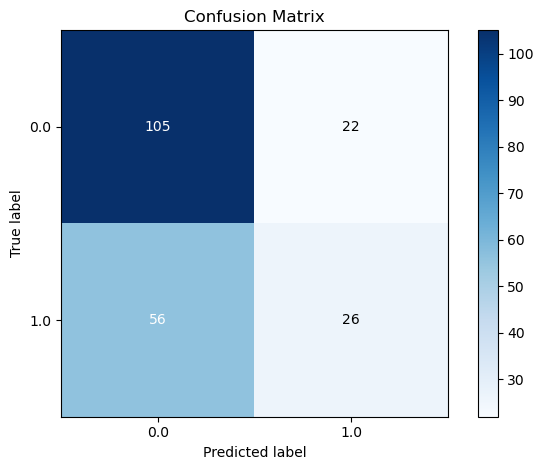

In [31]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')

Classification Report for Train Set
Accuracy Score 0.8396860986547086
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86       446
         1.0       0.95      0.71      0.82       446

    accuracy                           0.84       892
   macro avg       0.86      0.84      0.84       892
weighted avg       0.86      0.84      0.84       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

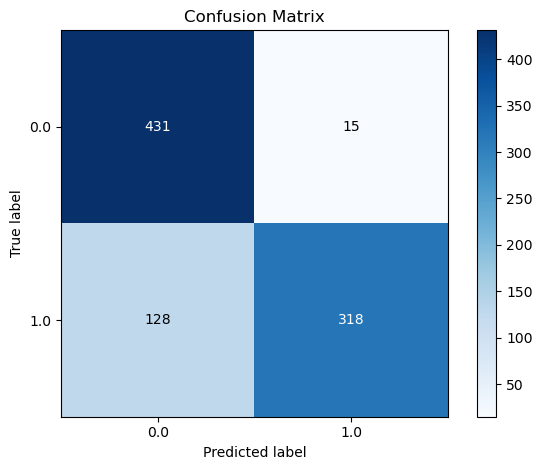

In [32]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [34]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,20),
}

In [35]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 20)},
             verbose=2)

In [36]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=16)

## Appying best estimators on Decision Tree

[[426  20]
 [ 55 391]]
Accuracy Score 0.9159192825112108
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       446
         1.0       0.95      0.88      0.91       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



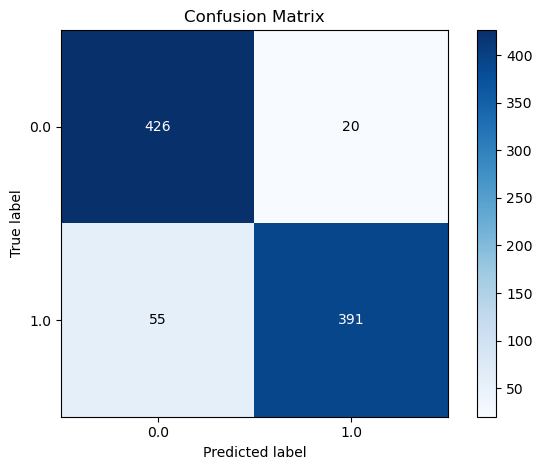

In [37]:
y_pred=best_grid_dt.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Decision Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))


[[99 28]
 [24 58]]
Accuracy Score 0.7511961722488039
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       127
         1.0       0.67      0.71      0.69        82

    accuracy                           0.75       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.75      0.75      0.75       209



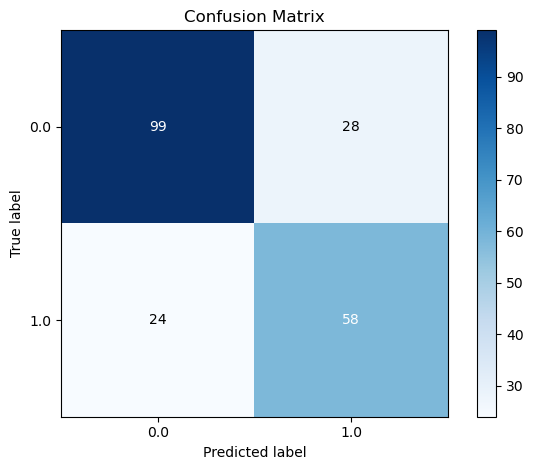

In [38]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))


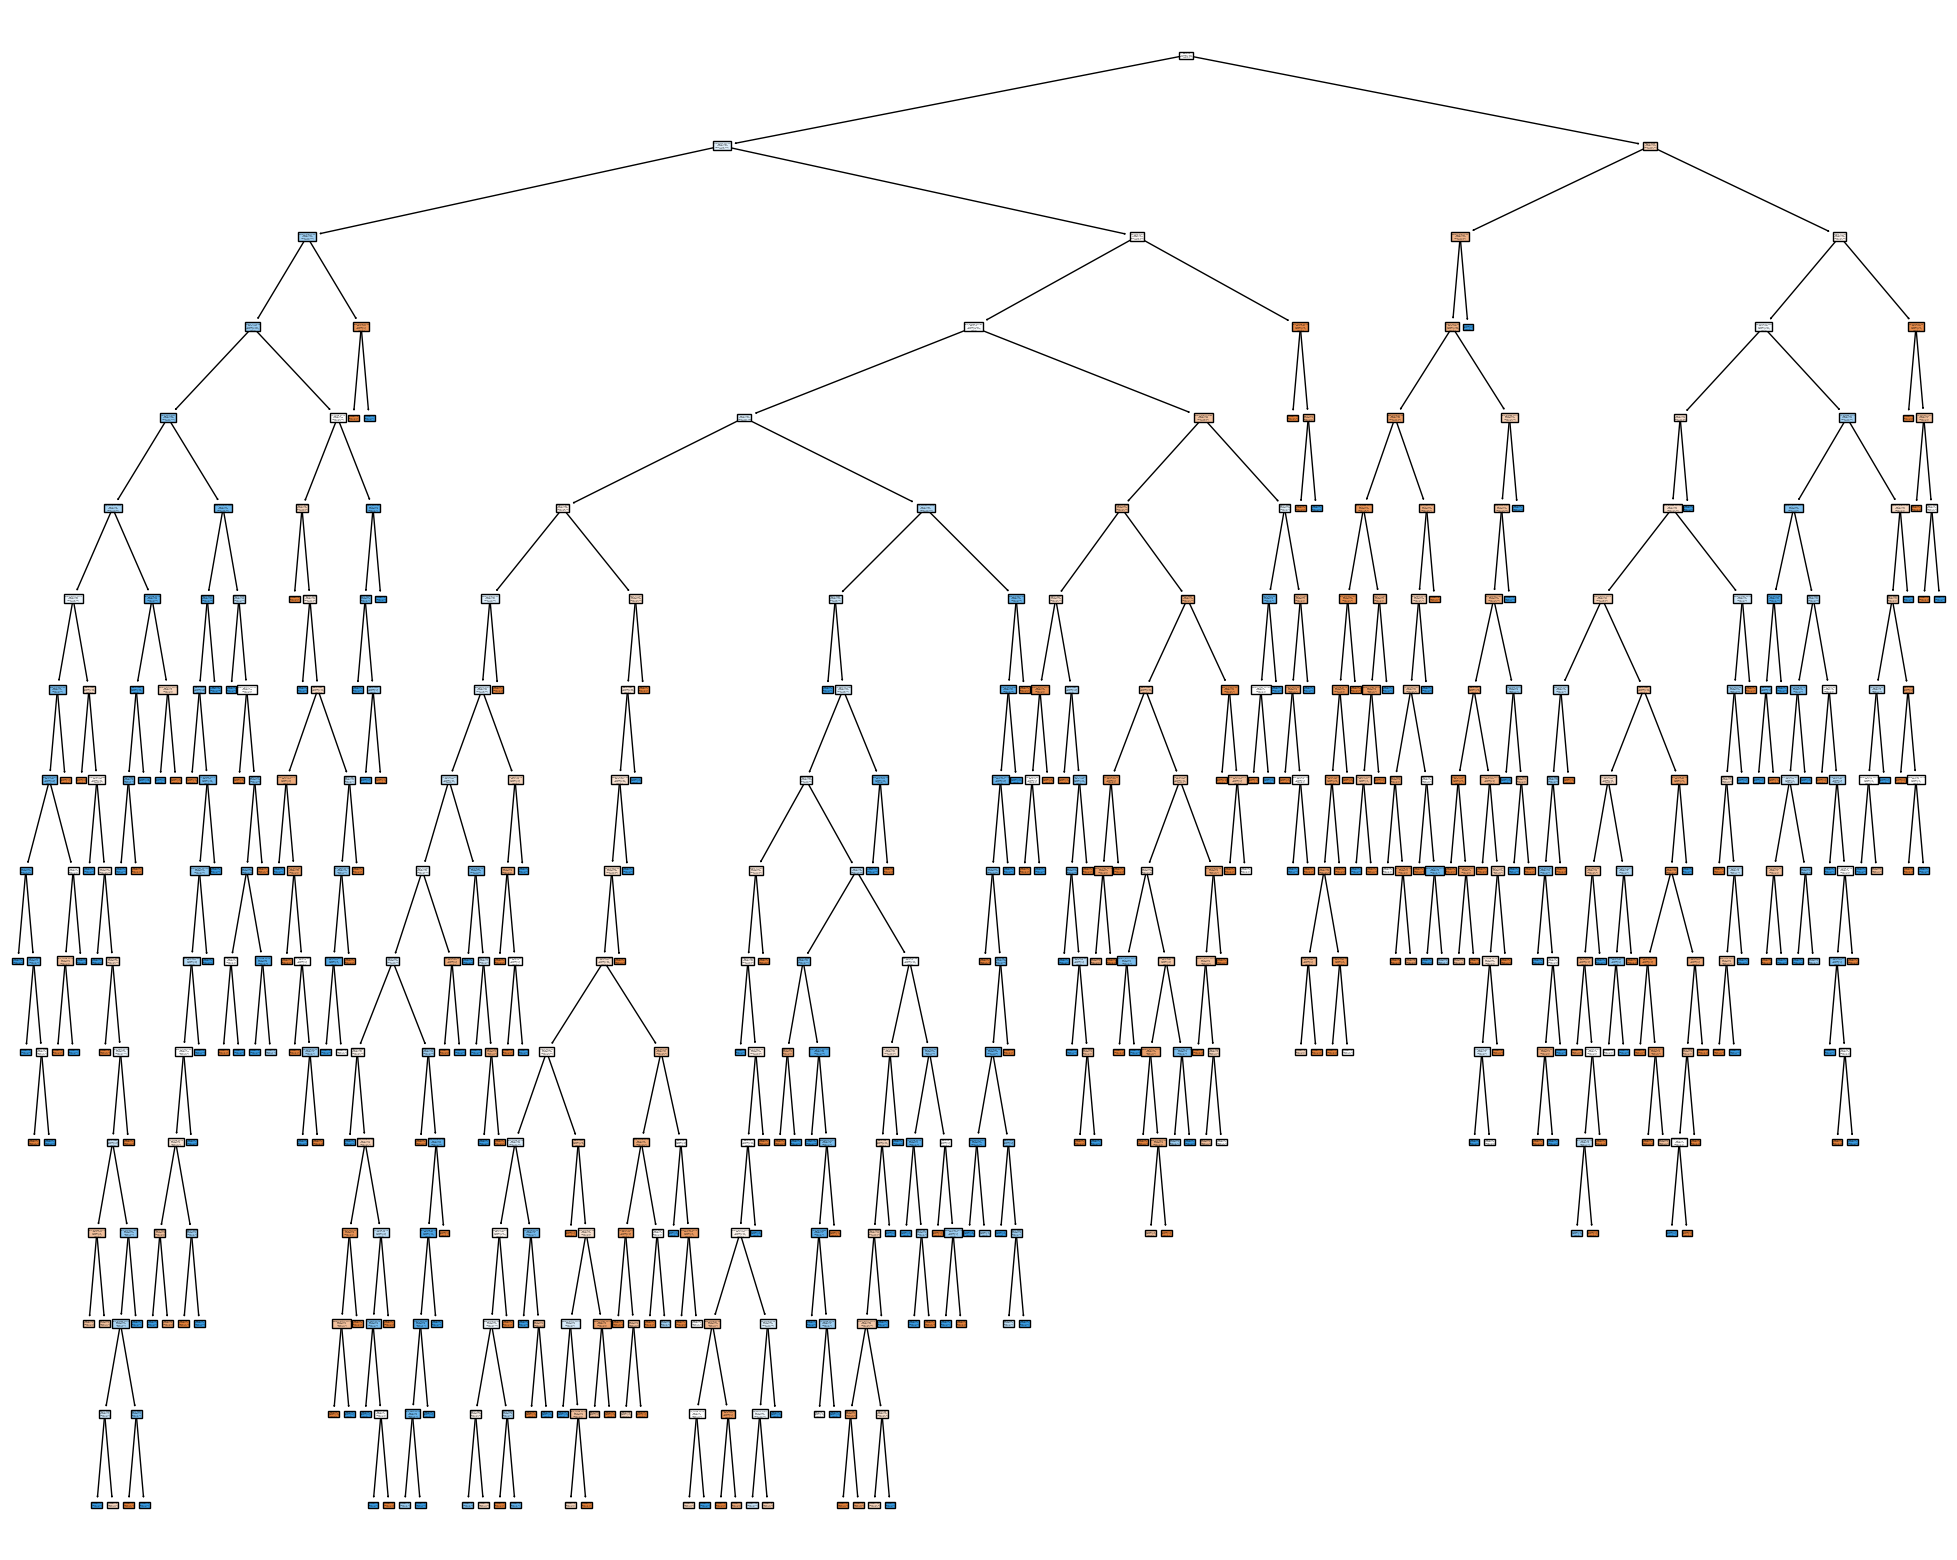

In [39]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [40]:
fig.savefig("decision_tree Q3.png")

Max Depth =  1 , Train Acc. =  0.561 , Test Acc. =  0.469
Max Depth =  2 , Train Acc. =  0.571 , Test Acc. =  0.617
Max Depth =  3 , Train Acc. =  0.593 , Test Acc. =  0.416
Max Depth =  4 , Train Acc. =  0.637 , Test Acc. =  0.498
Max Depth =  5 , Train Acc. =  0.665 , Test Acc. =  0.603
Max Depth =  6 , Train Acc. =  0.683 , Test Acc. =  0.574
Max Depth =  7 , Train Acc. =  0.715 , Test Acc. =  0.627
Max Depth =  8 , Train Acc. =  0.746 , Test Acc. =  0.627
Max Depth =  9 , Train Acc. =  0.786 , Test Acc. =  0.66
Max Depth =  10 , Train Acc. =  0.803 , Test Acc. =  0.675
Max Depth =  11 , Train Acc. =  0.831 , Test Acc. =  0.684
Max Depth =  12 , Train Acc. =  0.86 , Test Acc. =  0.718
Max Depth =  13 , Train Acc. =  0.881 , Test Acc. =  0.737
Max Depth =  14 , Train Acc. =  0.896 , Test Acc. =  0.699
Max Depth =  15 , Train Acc. =  0.902 , Test Acc. =  0.761
Max Depth =  16 , Train Acc. =  0.916 , Test Acc. =  0.746
Max Depth =  17 , Train Acc. =  0.92 , Test Acc. =  0.751
Max Depth

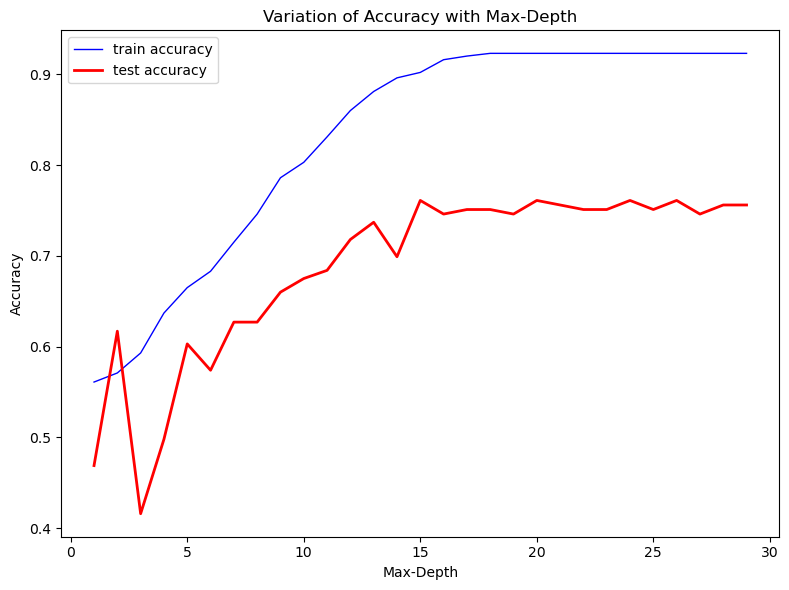

In [41]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [42]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  426   20
1   55  391

In [43]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  99  28
1  24  58

In [44]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       446
         1.0       0.95      0.88      0.91       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



In [45]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       127
         1.0       0.67      0.71      0.69        82

    accuracy                           0.75       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.75      0.75      0.75       209



## Hyperparameter Tuning on Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [47]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [48]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [49]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=30, max_features='sqrt')

## Applying best estimators in Random Forest

In [50]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt')

### Train

[[419  27]
 [ 42 404]]
Accuracy Score 0.922645739910314
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       446
         1.0       0.94      0.91      0.92       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



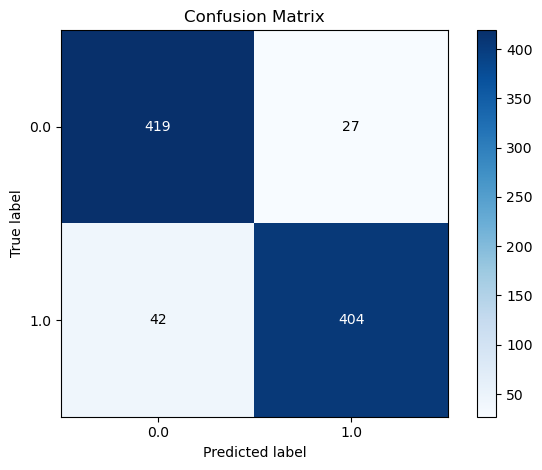

In [51]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [52]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[98 29]
 [22 60]]
Accuracy Score 0.7559808612440191
Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       127
         1.0       0.67      0.73      0.70        82

    accuracy                           0.76       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209



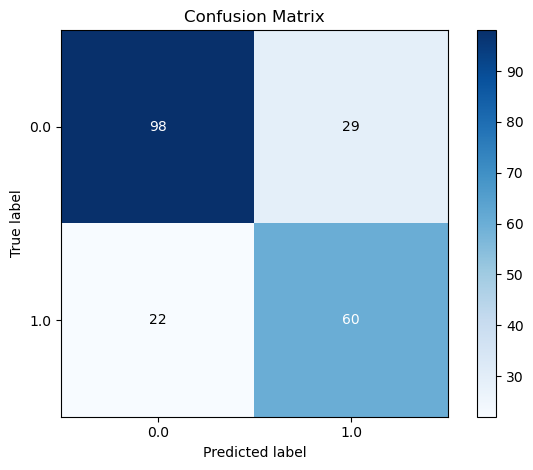

In [53]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

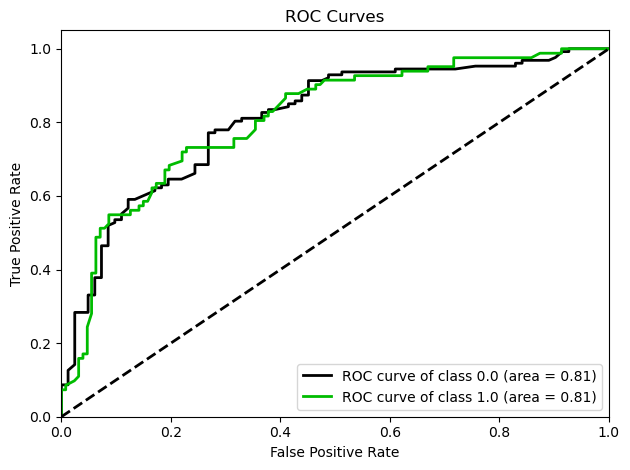

In [54]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q3')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [57]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gin

[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, max_depth=30, max_features=None, n_estimators=500; total time=   1.2s
[CV] END criterion=gini, max_depth=30, max_features=None, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_featur

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [58]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression()

In [59]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression()

### Train Set

[[277 169]
 [169 277]]
Accuracy Score 0.6210762331838565
Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62       446
         1.0       0.62      0.62      0.62       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.62       892
weighted avg       0.62      0.62      0.62       892



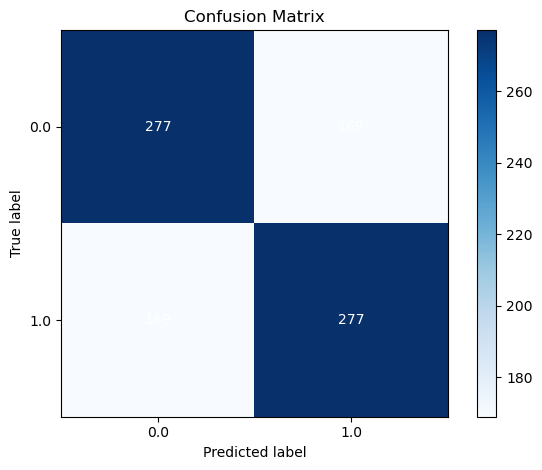

In [60]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[76 51]
 [27 55]]
Accuracy Score 0.6267942583732058
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.60      0.66       127
         1.0       0.52      0.67      0.59        82

    accuracy                           0.63       209
   macro avg       0.63      0.63      0.62       209
weighted avg       0.65      0.63      0.63       209



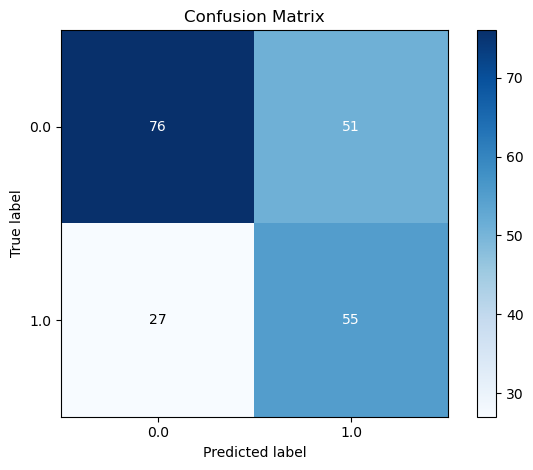

In [61]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [62]:
from sklearn.svm import SVC

In [63]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    #'C': [0.1, 1, 10, 100, 1000],
    #'gamma' : ['scale', 'auto'],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [64]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=16; total time=   0.0s
[CV] END .......................criterion=gi

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END ...................

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ...................

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END ...................

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ...................

[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=l

[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criteri

[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.1s
[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_stat

[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END c

[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END crite

[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, ran

[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.1s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END p

[CV] END break_ties=True, gamma=1, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamm

[CV] END break_ties=True, gamma=0.1, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=

[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.1, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END b

[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=Tru

[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] E

[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END b

[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s


[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0

[CV] END break_ties=True, gamma=0.001, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.001, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.001, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.001, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3

[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END b

[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_t

[CV] END break_ties=False, gamma=1, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.5s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamm

[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s


[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [65]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, gamma=1, kernel='poly', probability=True, random_state=42)

In [66]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, gamma=1, kernel='poly', probability=True, random_state=42)

### Train Set

[[350  96]
 [ 78 368]]
Accuracy Score 0.804932735426009
Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       446
         1.0       0.79      0.83      0.81       446

    accuracy                           0.80       892
   macro avg       0.81      0.80      0.80       892
weighted avg       0.81      0.80      0.80       892



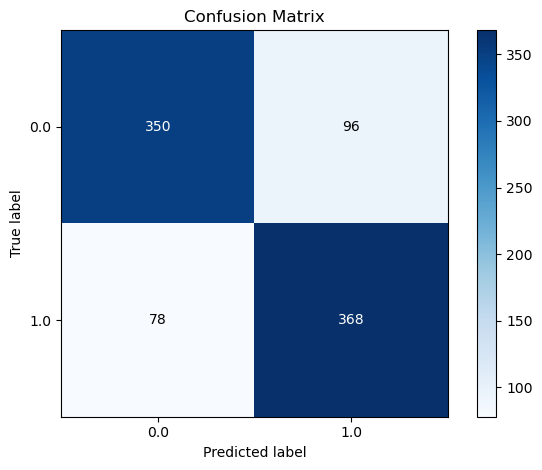

In [67]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[75 52]
 [23 59]]
Accuracy Score 0.6411483253588517
Classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.59      0.67       127
         1.0       0.53      0.72      0.61        82

    accuracy                           0.64       209
   macro avg       0.65      0.66      0.64       209
weighted avg       0.67      0.64      0.64       209



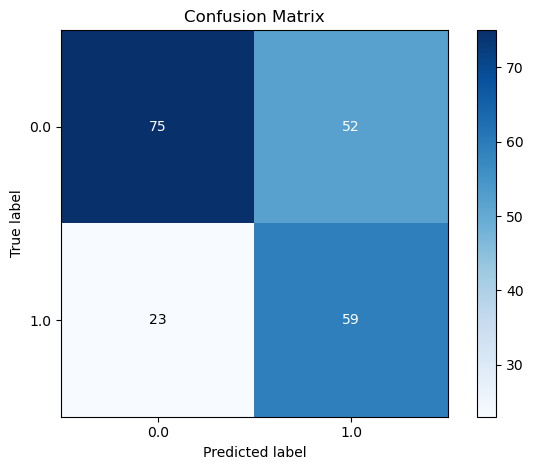

In [68]:
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [69]:
from  sklearn.naive_bayes import MultinomialNB

In [70]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [71]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [72]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=10.0, fit_prior=False)

In [73]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(alpha=10.0, fit_prior=False)

### Train Set

[[261 185]
 [187 259]]
Accuracy Score 0.5829596412556054
Classification report: 
              precision    recall  f1-score   support

         0.0       0.58      0.59      0.58       446
         1.0       0.58      0.58      0.58       446

    accuracy                           0.58       892
   macro avg       0.58      0.58      0.58       892
weighted avg       0.58      0.58      0.58       892



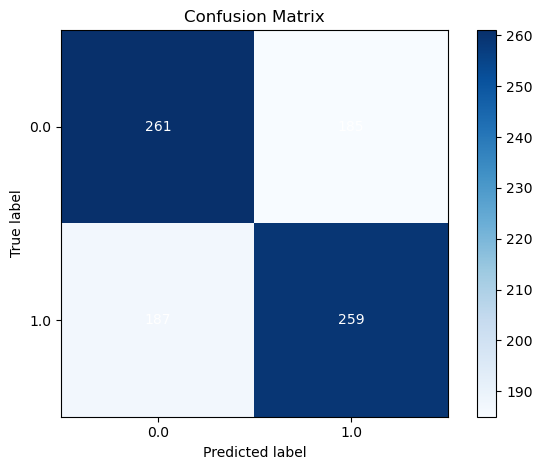

In [74]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[74 53]
 [34 48]]
Accuracy Score 0.583732057416268
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       127
         1.0       0.48      0.59      0.52        82

    accuracy                           0.58       209
   macro avg       0.58      0.58      0.58       209
weighted avg       0.60      0.58      0.59       209



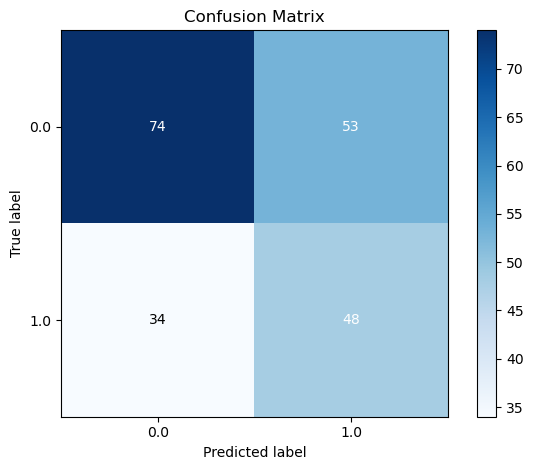

In [75]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [76]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [78]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        #('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('dt', DecisionTreeClassifier(max_depth=16)),
                             ('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='sqrt')),
                             ('svc',
                              SVC(break_ties=True, gamma=1, kernel='poly',
                                  probability=True, random_state=42))])

In [79]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6267942583732058
DecisionTreeClassifier 0.7511961722488039
LogisticRegression 0.6267942583732058
RandomForestClassifier 0.7368421052631579
SVC 0.6411483253588517
VotingClassifier 0.7177033492822966


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.9024663677130045
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       446
         1.0       0.95      0.85      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

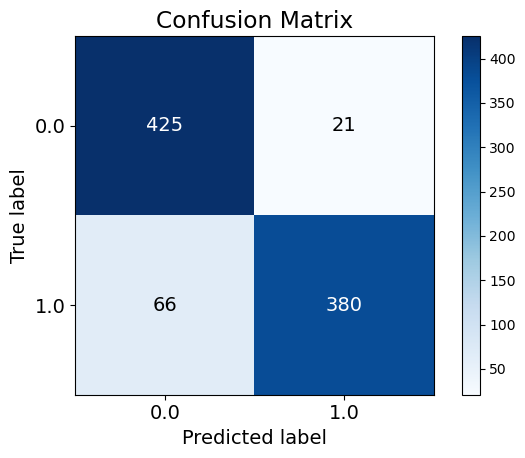

In [80]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.7177033492822966
Classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77       127
         1.0       0.64      0.65      0.64        82

    accuracy                           0.72       209
   macro avg       0.70      0.71      0.70       209
weighted avg       0.72      0.72      0.72       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

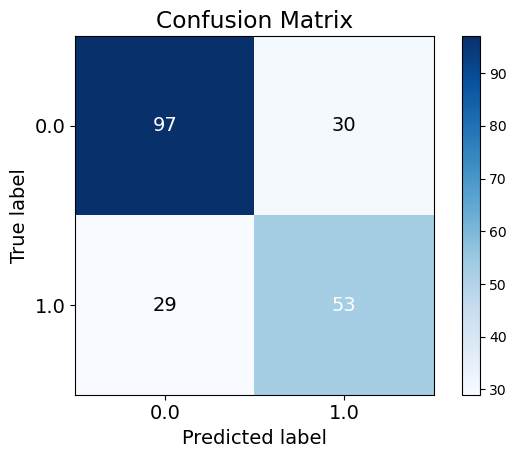

In [81]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [82]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('dt', DecisionTreeClassifier(max_depth=16)),
                             ('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='sqrt')),
                             ('svc',
                              SVC(break_ties=True, gamma=1, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb',
                              MultinomialNB(alpha=10.0, fit_prior=False))],
                 voting='soft')

In [83]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6267942583732058
DecisionTreeClassifier 0.7368421052631579
LogisticRegression 0.6267942583732058
RandomForestClassifier 0.7272727272727273
SVC 0.6411483253588517
MultinomialNB 0.583732057416268
VotingClassifier 0.7272727272727273


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.9024663677130045
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       446
         1.0       0.95      0.85      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

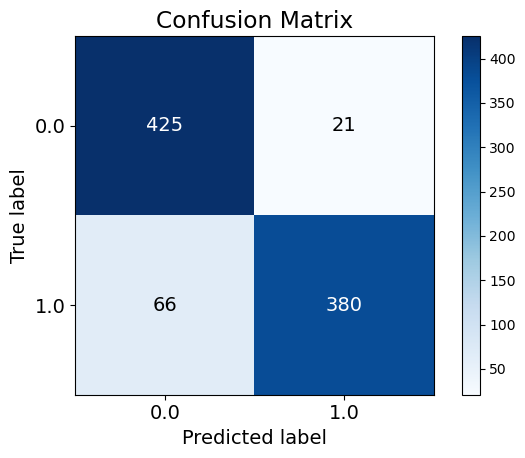

In [84]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.7272727272727273
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       127
         1.0       0.64      0.71      0.67        82

    accuracy                           0.73       209
   macro avg       0.72      0.72      0.72       209
weighted avg       0.73      0.73      0.73       209



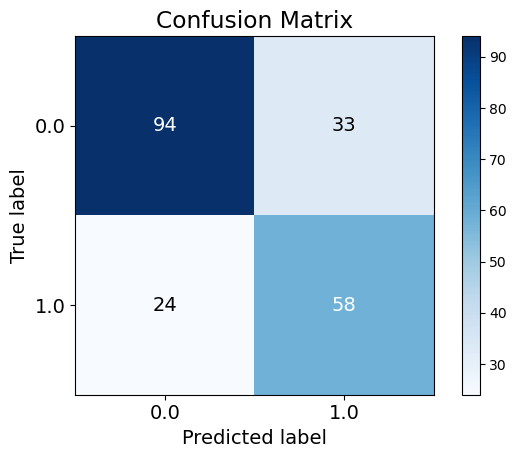

In [85]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [87]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.7298206278026906
Test Accuracy 0.7368421052631579
Train Accuracy 0.922645739910314


Accuracy Score 0.7368421052631579
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       127
         1.0       0.66      0.70      0.67        82

    accuracy                           0.74       209
   macro avg       0.73      0.73      0.73       209
weighted avg       0.74      0.74      0.74       209



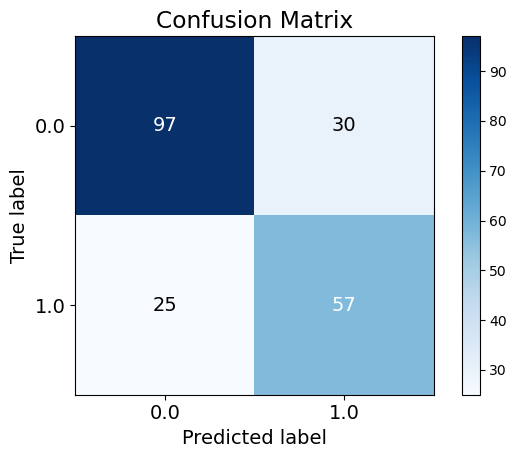

In [88]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 0.922645739910314
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       446
         1.0       0.93      0.91      0.92       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



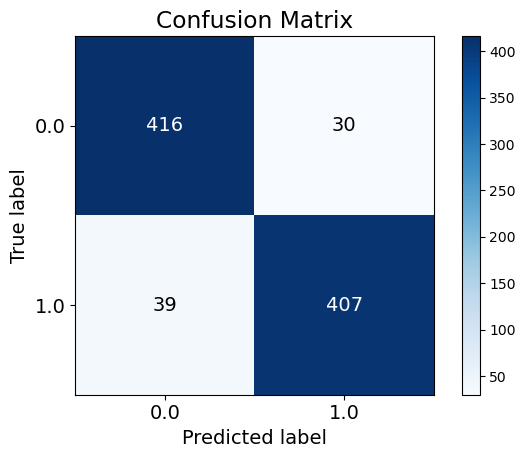

In [89]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [90]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7174887892376681  test acc =  0.5933014354066986 oob =  0.6177130044843049
Num of estimators:  100  train acc =  0.7118834080717489  test acc =  0.5933014354066986 oob =  0.6165919282511211
Num of estimators:  150  train acc =  0.7118834080717489  test acc =  0.6172248803827751 oob =  0.6042600896860987
Num of estimators:  200  train acc =  0.7163677130044843  test acc =  0.6124401913875598 oob =  0.6076233183856502
Num of estimators:  250  train acc =  0.726457399103139  test acc =  0.6028708133971292 oob =  0.6121076233183856
Num of estimators:  300  train acc =  0.7174887892376681  test acc =  0.6028708133971292 oob =  0.6165919282511211
Num of estimators:  350  train acc =  0.7286995515695067  test acc =  0.5933014354066986 oob =  0.6210762331838565
Num of estimators:  400  train acc =  0.7242152466367713  test acc =  0.6028708133971292 oob =  0.625560538116592
Num of estimators:  450  train acc =  0.7219730941704036  test acc =  0.60287081339

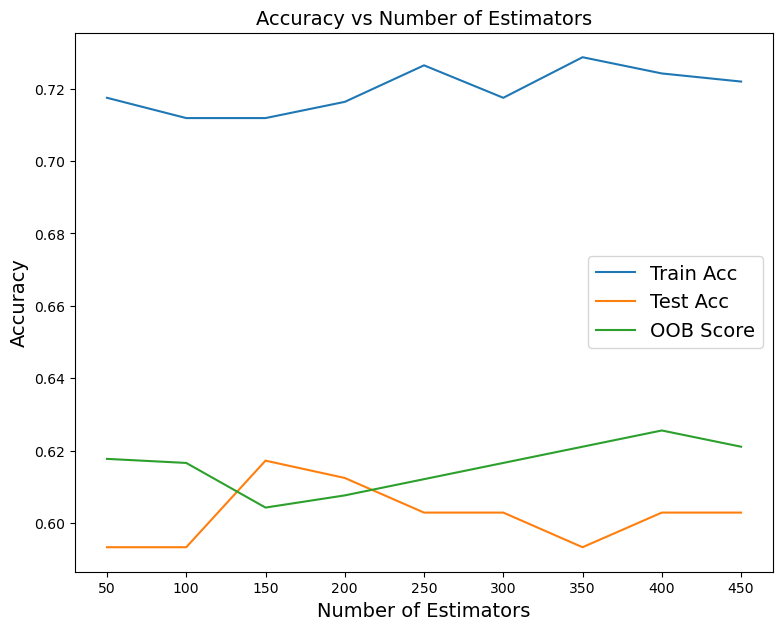

In [91]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15), n_estimators=100,
    learning_rate=0.4, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7129186602870813

### Train Set

Accuracy Score 0.922645739910314
Classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       446
         1.0       0.92      0.93      0.92       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



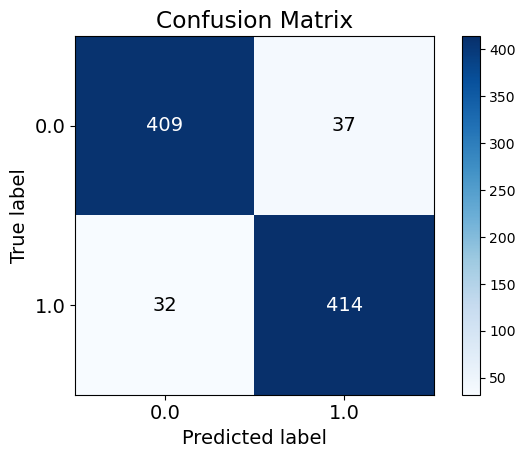

In [93]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

In [94]:
### Test Set

Accuracy Score 0.7129186602870813
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.69      0.74       127
         1.0       0.61      0.76      0.67        82

    accuracy                           0.71       209
   macro avg       0.71      0.72      0.71       209
weighted avg       0.73      0.71      0.72       209



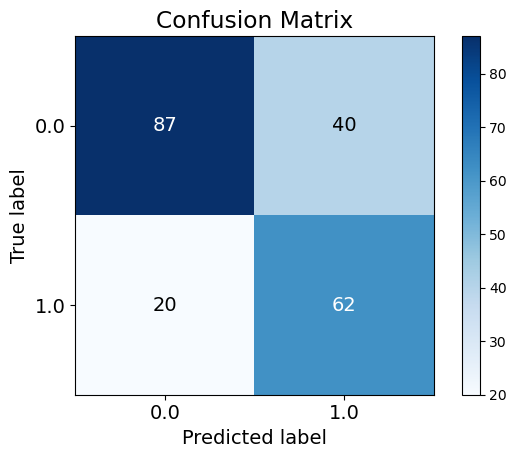

In [95]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [96]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

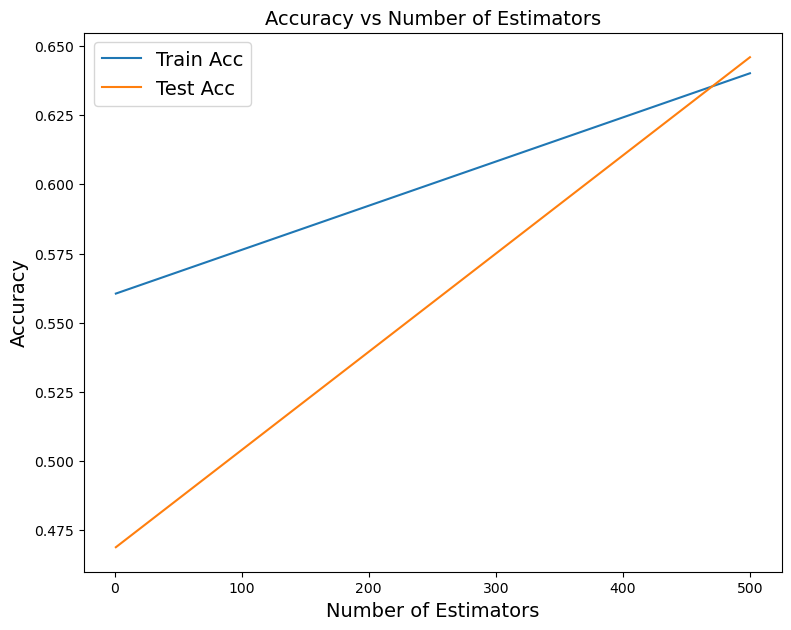

In [97]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [98]:
import xgboost as xgb

In [99]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7033492822966507

### Train Set

Accuracy Score 0.8957399103139013
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       446
         1.0       0.90      0.89      0.90       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



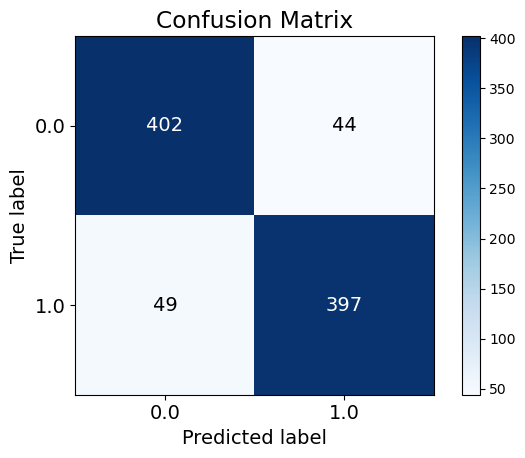

In [100]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.7033492822966507
Classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74       127
         1.0       0.60      0.72      0.66        82

    accuracy                           0.70       209
   macro avg       0.70      0.71      0.70       209
weighted avg       0.72      0.70      0.71       209



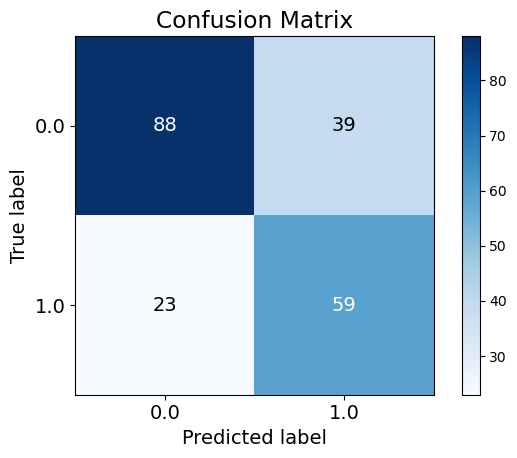

In [101]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [102]:
#conda install -c conda-forge ds-lime

In [103]:
from lime.lime_tabular import LimeTabularExplainer

In [104]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [105]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [106]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [107]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [108]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.17666667 0.82333333]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [109]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
Fjob_health <= 0.00 0.19224031147319376
Pstatus_A <= 0.00 0.14035589198477905
famrel <= 0.75 0.137211667125922
0.14 < age <= 0.29 0.10216476593787611
Fjob_teacher <= 0.00 0.09647508889726103
Fjob_at_home <= 0.00 0.050657443890790174
0.00 < Fjob_services <= 1.00 0.04700293034042108
guardian_father <= 0.00 -0.04622182998837437
famsup_no <= 0.00 -0.04377557026653371
0.00 < famsize_LE3 <= 1.00 0.043496365955720505
Mjob_services > 0.00 0.03103112478682935
Mjob_teacher <= 0.00 -0.027972187979926132
famsize_GT3 <= 0.00 0.020381039791633374
Mjob_at_home <= 0.00 0.01846843012430747
Mjob_health <= 0.00 -0.005497535517232135
0.00 < guardian_mother <= 1.00 -0.0027511102378286446
guardian_other <= 0.00 0.0020207334186159534


### Feature Importance Plot

In [110]:
feature_importance = explanation_lime.as_list()


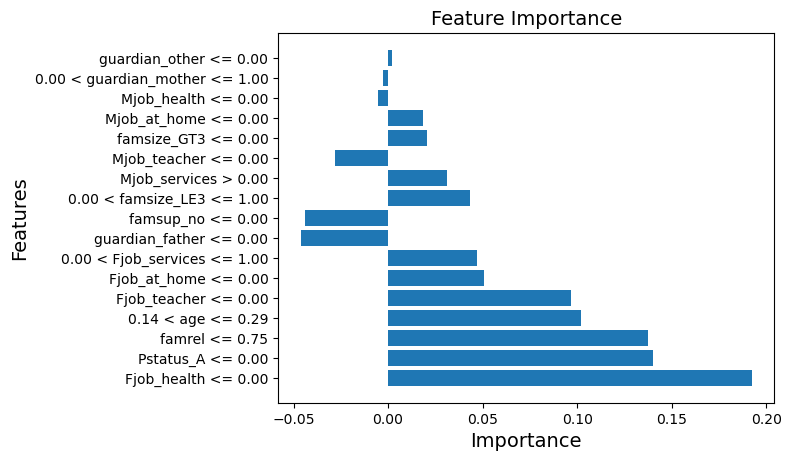

In [111]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [112]:
feature_contributions = explanation_lime.local_exp[1]

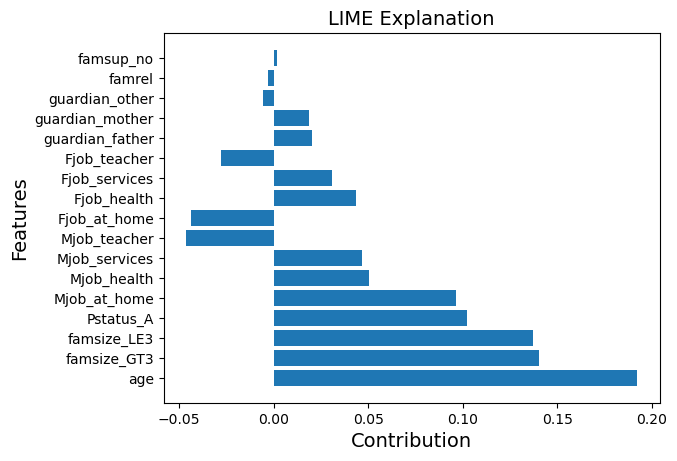

In [113]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [114]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  1.0
Actual:  1.0


### Explanation for class 0

In [115]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [116]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     1.0
1     1.0     1.0
2     1.0     0.0
3     1.0     1.0
4     0.0     0.0
5     0.0     0.0
6     0.0     1.0
7     1.0     1.0
8     0.0     0.0
9     0.0     0.0

# SHAP

In [117]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [118]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


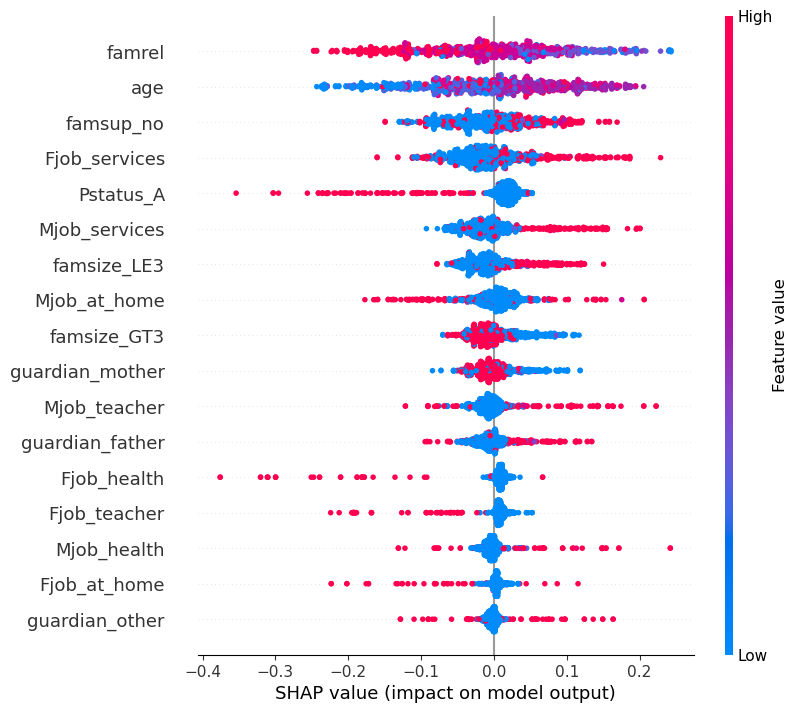

<Figure size 640x480 with 0 Axes>

In [119]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

In [120]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

age  famsize_GT3  famsize_LE3  Pstatus_A  Mjob_at_home  Mjob_health  \
190  0.0          1.0          0.0        0.0           0.0          0.0   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_services  \
190            0.0           0.0           0.0          0.0            0.0   

     Fjob_teacher  guardian_father  guardian_mother  guardian_other  famrel  \
190           0.0              0.0              1.0             0.0     0.5   

     famsup_no  alc  
190        0.0  1.0

In [121]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)